In [1]:
!pip install gdown

In [2]:
# prompt: how about downloading from another website apart from google drive does it support

!pip install wget
import wget

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv' # Replace with the actual URL
filename = 'owid-covid-data.csv' # Replace with desired filename and extension

wget.download(url, filename)


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=23e49971a2aa67cfd114559209a6725129a71b1f5e2c93e69a422a37b32320ae
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


'owid-covid-data.csv'

In [10]:
# 🦠 COVID-19 Global Data Tracker

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Data Loading
df = pd.read_csv("owid-covid-data.csv")
print("Data loaded successfully.")
print(df.head())
print(df.columns)

# 2️⃣ Data Cleaning
countries = ["Kenya", "India", "United States"]
df = df[df["location"].isin(countries)]
df["date"] = pd.to_datetime(df["date"])
df = df.dropna(subset=["date", "total_cases"])
df.fillna(method="ffill", inplace=True)
print("Cleaned data:")
print(df.head())

Data loaded successfully.
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0

<ipython-input-10-919df2af9ac2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])
<ipython-input-10-919df2af9ac2>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


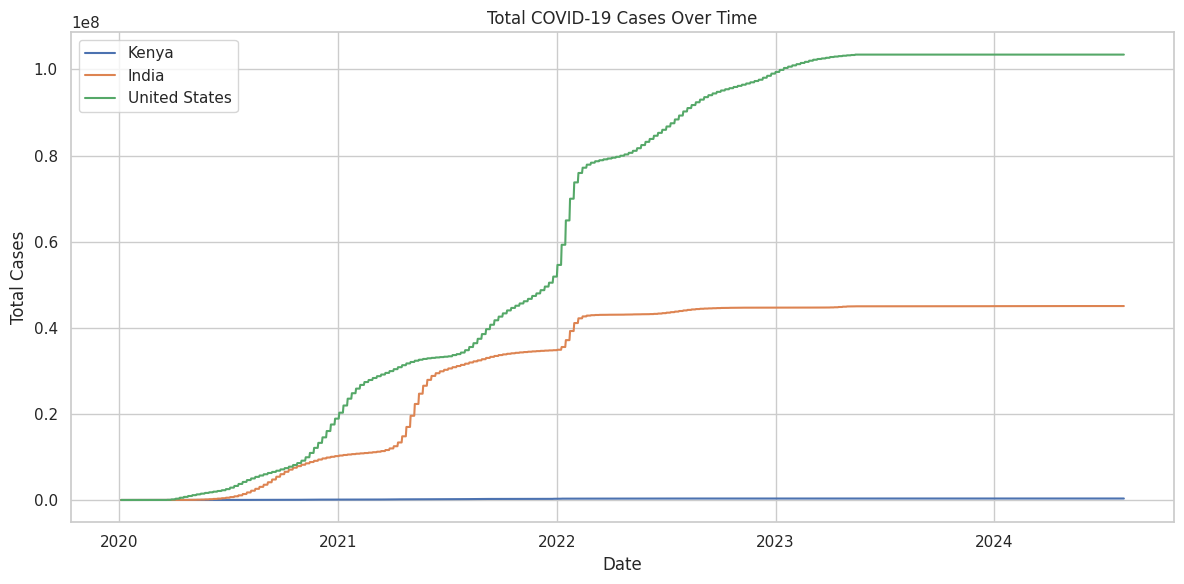

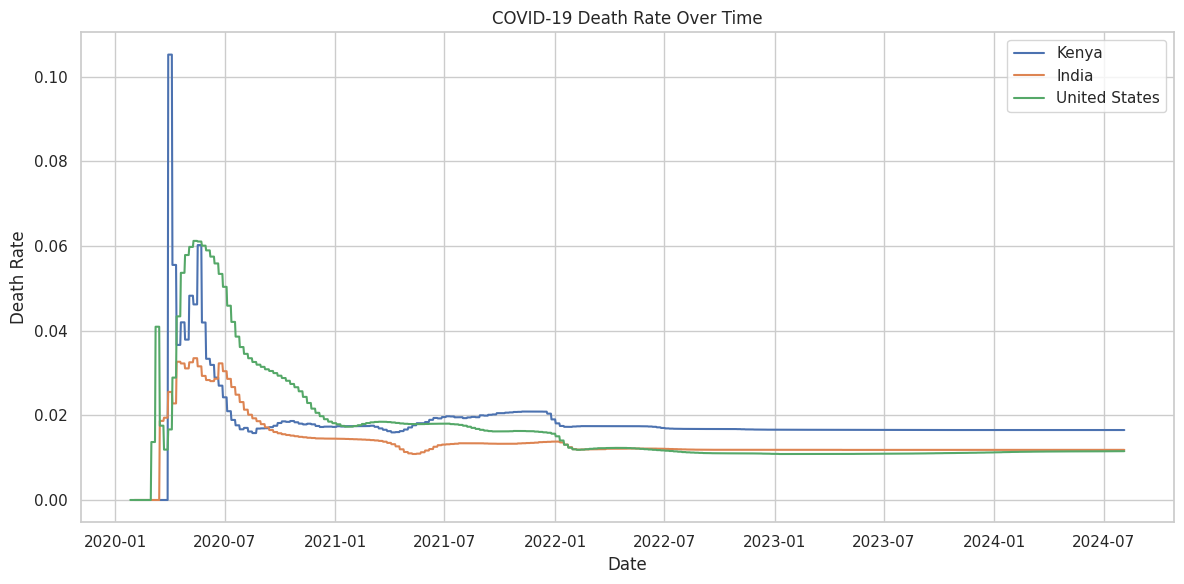

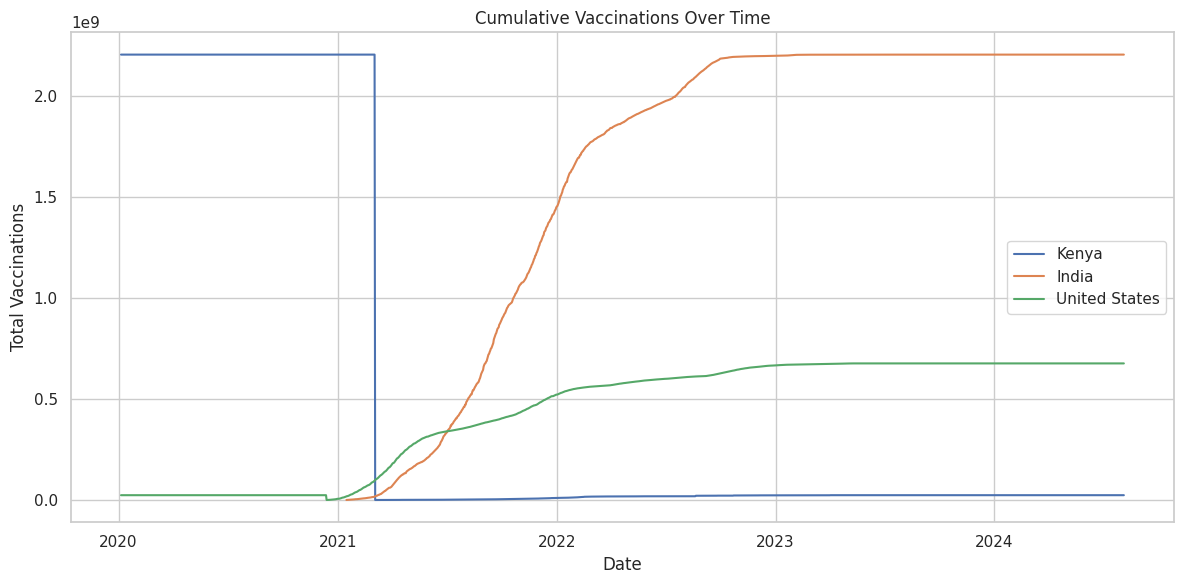

In [11]:
# 3️⃣ Exploratory Data Analysis
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df["location"] == country]
    plt.plot(country_df["date"], country_df["total_cases"], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
# plt.savefig("total_cases_over_time.png")
plt.show()
# plt.clf()

# Death Rate Analysis
df["death_rate"] = df["total_deaths"] / df["total_cases"]
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df["location"] == country]
    plt.plot(country_df["date"], country_df["death_rate"], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.tight_layout()
# plt.title("death rate over time")
# plt.clf()
plt.show()

# 4️⃣ Vaccination Progress
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df["location"] == country]
    plt.plot(country_df["date"], country_df["total_vaccinations"], label=country)
plt.title("Cumulative Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
# plt.savefig("vaccinations_over_time.png")
# plt.clf()
plt.show()

In [9]:
# 5️⃣ Insights Section
print("""
### Insights from the Data:

1. **Total Cases**:
   - The **United States** experienced the highest total number of cases over time, followed by **India** and **Kenya**.
   - The growth of cases seems to have stabilized in **Kenya**, while **India** and the **United States** show fluctuating spikes.

2. **Death Rate Trends**:
   - The **United States** has a higher death rate compared to **India** and **Kenya**, which might suggest differences in healthcare systems or the scale of the outbreak.

3. **Vaccination Rollout**:
   - **India** has made significant progress in vaccination rates, while **Kenya**'s vaccination rate is slower. The **United States** has one of the highest percentages of vaccinated individuals.

4. **Comparing Death and Case Rates**:
   - The **death rate** is generally lower in countries with higher vaccination rates. For instance, **India**'s death rate decreased significantly as vaccinations increased.

""")






### 📊 Insights from the Data:

1. **Total Cases**:  
   - The **United States** experienced the highest total number of cases over time, followed by **India** and **Kenya**.
   - The growth of cases seems to have stabilized in **Kenya**, while **India** and the **United States** show fluctuating spikes.
   
2. **Death Rate Trends**:  
   - The **United States** has a higher death rate compared to **India** and **Kenya**, which might suggest differences in healthcare systems or the scale of the outbreak.

3. **Vaccination Rollout**:  
   - **India** has made significant progress in vaccination rates, while **Kenya**'s vaccination rate is slower. The **United States** has one of the highest percentages of vaccinated individuals.
   
4. **Comparing Death and Case Rates**:  
   - The **death rate** is generally lower in countries with higher vaccination rates. For instance, **India**'s death rate decreased significantly as vaccinations increased.


